Student Details

Name:Michel Danjou

ID: 18263461

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Task 4
  * Perform classification on dataset_1 using an **SVM with linear kernel**
  * Experiment with the C-parameter to find the widest margin solution with a **hard margin** and a **soft margin**. 

#### Rubric


| Beginning [0-8]       | Developing [9-12]           | Accomplished [13-16]  |Exemplary [17-20] |
| ------------- |:-------------:| -----:|-------------|
| No plots provided or plots do not provide the correct information. | Plot for either soft- or hard-margin SVM. | Two plots for suitable values of the C-parameter showing the difference between a soft- and hard-margin SVM. | Two plots for suitable values of the C-parameter showing the difference between a soft- and hard-margin SVM. Numerical data with explanation to support the conclusions drawn from the graphs.|


  * This task provides an insight in how SVM’s try to find a hyperplane (which in two dimensions is a line) which divides two classes with the maximum margin on either side of the hyperplane. 
  * You can use the **C-parameter as a form of regularization**; with this parameter you can allow the SVM to miss-classify certain points to allow a wider margin and thus, hopefully, a better performance out-of-sample.

 

## Preparation
Reference: https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

In [2]:
import pandas as pd

df = pd.read_csv("./dataset_1.csv")
df.describe()

,Unnamed: 0,0,1,2
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.000000,0.082508,-0.004040,0.668233
std,2887.184355,0.615153,0.575639,0.470871
min,0.000000,-0.999635,-1.400000,0.000000
25%,2500.000000,-0.496767,-0.496319,0.000000
50%,5000.000000,0.208210,-0.006960,1.000000
75%,7500.000000,0.614940,0.491170,1.000000
max,10000.000000,0.999983,0.999918,1.000000


In [3]:
df.shape

(10001, 4)

In [4]:
df.head()

,Unnamed: 0,0,1,2
0,0,-0.331982,-0.926029,1.0
1,1,-0.819310,-0.242368,0.0
2,2,0.922427,0.499088,1.0
3,3,-0.570793,0.562286,0.0
4,4,0.375817,-0.941165,1.0


In [5]:
df.tail()

,Unnamed: 0,0,1,2
9996,9996,0.628792,-0.562407,1.0
9997,9997,0.595028,0.646407,1.0
9998,9998,0.246373,0.240260,1.0
9999,9999,-0.338258,0.581075,0.0
10000,10000,-0.950000,-1.400000,1.0


In [6]:
df['2'].value_counts()

1.0    6683
0.0    3318
Name: 2, dtype: int64

#### Observations
  * It appears that the column `Unamed: 0` is just and index that could be removed.
  * The target appears to be column `2` which is binary in nature.
  * The target is **inbalanced** with twice more `1s` than `0s`.
  
We know have enough information to define our features and target.

In [7]:
X = df.drop(["Unnamed: 0", "2"], axis=1)
y = df["2"]

In [8]:
X.head()

,0,1
0,-0.331982,-0.926029
1,-0.819310,-0.242368
2,0.922427,0.499088
3,-0.570793,0.562286
4,0.375817,-0.941165


In [9]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: 2, dtype: float64

## SVM with linear kernel
Resources: 
  * https://scikit-learn.org/stable/modules/svm.html
  * https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [10]:
X_np = X.values
y_np = y.values

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.20, shuffle=True, stratify=y)

# linear kernel
#clf = svm.SVC(kernel='linear', C=0.001)
C = 1
clf = svm.SVC(kernel='linear', C=C)
clf.kernel


clf.fit(X_train, y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
clf.score(X_test, y_test)

1.0

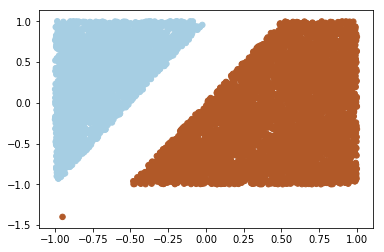

In [13]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)


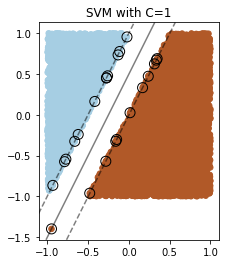

In [14]:
def plot_svm(clf, X_train, y_train, C):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    title = 'SVM with C=' + str(C)
    plt.title(title)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    plt.show()

    
def print_metrics(clf, C, score):
    header = "="*10 + " SVM with C=" + str(C) + " " + "="*10
    print(header)
    print("Nb support vectors: ", len(clf.support_vectors_))
    print("Nb support vectors per class:", clf.n_support_ )
    print("Score :", score)
    #print("Support vectors   : ", clf.support_vectors_)
    return len(clf.support_vectors_)
    
plot_svm(clf, X_train, y_train, C)

Iterate over a few values of C

========== SVM with C=0.001 ==========
Nb support vectors:  3992
Nb support vectors per class: [1996 1996]
Score : 1.0


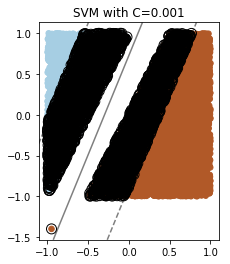

========== SVM with C=0.01 ==========
Nb support vectors:  1139
Nb support vectors per class: [570 569]
Score : 1.0


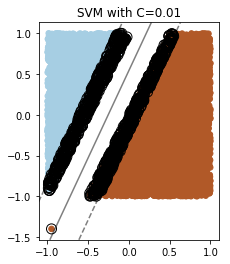

========== SVM with C=0.1 ==========
Nb support vectors:  182
Nb support vectors per class: [91 91]
Score : 1.0


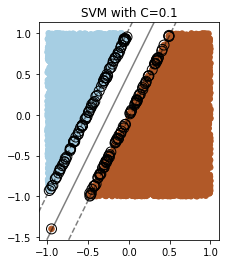

========== SVM with C=1 ==========
Nb support vectors:  23
Nb support vectors per class: [12 11]
Score : 1.0


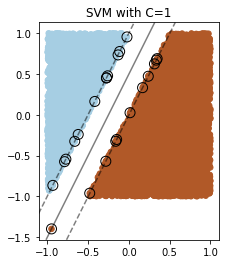

========== SVM with C=10 ==========
Nb support vectors:  6
Nb support vectors per class: [3 3]
Score : 1.0


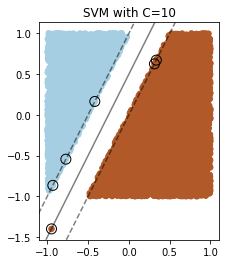

========== SVM with C=50 ==========
Nb support vectors:  3
Nb support vectors per class: [1 2]
Score : 1.0


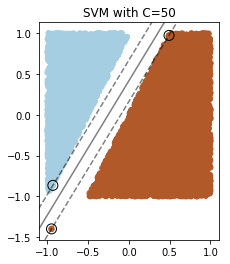

========== SVM with C=100 ==========
Nb support vectors:  3
Nb support vectors per class: [1 2]
Score : 1.0


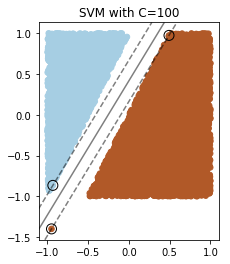

========== SVM with C=1000 ==========
Nb support vectors:  3
Nb support vectors per class: [1 2]
Score : 1.0


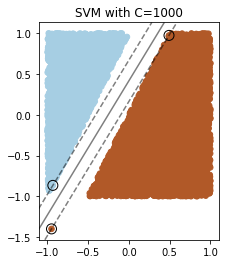

In [15]:
Cs=[0.001, 0.01, 0.1,1, 10, 50, 100, 1000]
nb_sv=[]

for C in Cs:
    clf = svm.SVC(kernel='linear', C=C)
    clf.kernel
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    nb_sv.append(len(clf.support_vectors_))
    print_metrics(clf, C, score)
    plot_svm(clf, X_train, y_train, C)


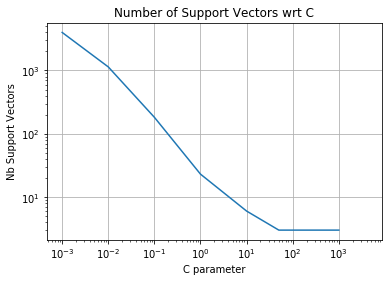

In [16]:
plt.plot(Cs, nb_sv)
plt.ylabel('Nb Support Vectors')
plt.xlabel('C parameter')
plt.title('Number of Support Vectors wrt C')

ax = plt.gca()
ax.semilogx(C, np.exp(-C))
ax.semilogy(np.amax(nb_sv), np.exp(-np.amax(nb_sv)))

ax.grid()
plt.show()

## Observations
Resource: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

#### Score
Since the data is linearly separable, the score is consistently at 1.

#### The isolated point
We notice an isolated point between the two distributions. Our experimentation allows us to see that:
  * Varying C seems does not vary the class predicted by SVM for the isolated point.
  * The isolated point is on the decision boundary for a low C, and on the margin for a high C.

#### Low C
With a low C (0.001), we endup with a large collection of support vectors which are used to calculate the margins. This is represented graphically with a large outer band of black circles. As a consequence the margins is very wide.
  * This is a case of soft margin which means we are underfitting.

#### Medium C
For a medium C (10) 
  * we have a relatively small amount of support vectors (5)
  * the margins are robust as they are parallel to the distribution borders as shown on the plot.

#### High C
With a high C (>=50)

  * The number of Support vectors does not go below 3 which is the absolute minimum for determining vectors representing the margins. 
  * the width of the margins is smaller than for a medium value of C.
  * the margins are not parallel to the classes distributions (skewed). 
  * This is a case of hard margin which means overfitting.
  
#### C 
The plot "Number of Support Vectors wrt C" shows that:
  * there is a high number of Support Vectors for low values of C.
  * the lowest number of Support Vectors is 3 which is obtained when C is between 50 and 100.

### Conclusion
The graphical representation of the margins and the data set allows us to form the intuition that, given linearly separable data, the more robust margins are achieved for a medium value of C.

One can say that using a using a high C (low #SV) indicates that we have little confidence in the data's distribution and we prefer to work on the most restrictive boundaries.


# Task 5

Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable **kernels and hyper-parameters**.

#### Rubric


| Beginning [0-8]       | Developing [9-12]           | Accomplished [13-16]  |Exemplary [17-20] |
| ------------- |:-------------:| -----:|-------------|
| Exploration with sub-optimal kernel / hyper parameter choices for all data sets. | Suitable kernels and hyper parameters proposed for one data set. | Suitable kernels and hyper parameters proposed for two data sets. Proper use of train and test data and plots of the SVM hyperplane. | Suitable kernels and hyper parameters  proposed for all datasets. Proper use of train and test data and plots of the SVM hyperplane. Evidence of a structured approach to the selection of hyper-parameters. |


  * This task provides an insight in how a kernel can allow the SVM (a linear classifier) to be used on non-linearly separable data sets by casting the data in some **higher dimensional space as determined by the kernel** you choose. 
  * In addition to choosing a suitable kernel, you will find that tuning the hyper-parameters of the SVM is important. 
  * Take some time to **explore various kernels and values of the hyper-parameters** to get a feel for how they affect performance and then **use a structured approach** to arrive at your final conclusions. 
  * Take into consideration the out-of-sample error (simulated and based on theory (see lecture 14 from Learning from Data)). 

For this task you may import two extra libraries: one to create train-test splits and one to perform a grid search of your choosing.

 

In [17]:
def make_svc_grid_search():

    # param_grid based on 2 separate entries, one for linear kernel, another one for rbf/poly. 
    # Inspired by Abhijit Sinha
    param_grid = [{'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
                        {'kernel': ['rbf', 'poly'],
                         'gamma': [0.001, 0.01, 0.1, 1, 'auto'],
                         'C': [0.01, 0.1, 1, 10, 100],
                         'degree': [2, 3]
                        }]
    
    svm_classifier = svm.SVC()
    return GridSearchCV(svm_classifier, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

    
    
def run_gridsearch(grid_search, X_train, y_train, X_test, y_test):
    grid_search.fit(X_train, y_train)
    
    # Calculate Expected Eout
    nb_sv = len(grid_search.best_estimator_.support_vectors_)
    nb_samples = len(X_train)
    Eeout = nb_sv / (nb_samples - 1) 
    
    # Calculate Eout as the score on test data
    tst_data_score = grid_search.best_estimator_.score(X_test, y_test)
    
    print("best params    : ", grid_search.best_params_)
    print("best score     : ", grid_search.best_score_ )
    print("nb SV          : ", nb_sv)
    print("expected[Eout] : ", Eeout)
    print("test_data_score: ", tst_data_score)
    
    return grid_search


In [18]:
def plot_svm_grdsrch(X_train, y_train, clf):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)


    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()



In [19]:
df1 = pd.read_csv("./dataset_1.csv")
df1.describe()

,Unnamed: 0,0,1,2
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.000000,0.082508,-0.004040,0.668233
std,2887.184355,0.615153,0.575639,0.470871
min,0.000000,-0.999635,-1.400000,0.000000
25%,2500.000000,-0.496767,-0.496319,0.000000
50%,5000.000000,0.208210,-0.006960,1.000000
75%,7500.000000,0.614940,0.491170,1.000000
max,10000.000000,0.999983,0.999918,1.000000


In [20]:
df2 = pd.read_csv("./dataset_2.csv")
df2.describe()

,Unnamed: 0,0,1,2
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.000081,-0.000563,0.332800
std,2886.89568,0.574913,0.274366,0.471239
min,0.00000,-0.999780,-0.951513,0.000000
25%,2499.75000,-0.506704,-0.182047,0.000000
50%,4999.50000,0.001152,-0.002540,0.000000
75%,7499.25000,0.494439,0.180595,1.000000
max,9999.00000,0.999979,0.956530,1.000000


In [21]:
df3 = pd.read_csv("./dataset_3.csv")
df3.describe()

,Unnamed: 0,0,1,2
count,10000.00000,10000.000000,10000.000000,10000.00000
mean,4999.50000,-0.004890,-0.002304,0.88240
std,2886.89568,0.612958,0.616565,0.32215
min,0.00000,-0.999962,-0.999991,0.00000
25%,2499.75000,-0.571095,-0.585002,1.00000
50%,4999.50000,-0.007848,-0.007517,1.00000
75%,7499.25000,0.561483,0.585625,1.00000
max,9999.00000,0.999805,0.999790,1.00000


In [22]:
X1 = df1.drop(["Unnamed: 0", "2"], axis=1)
y1 = df1["2"]

X2 = df2.drop(["Unnamed: 0", "2"], axis=1)
y2 = df2["2"]

X3 = df3.drop(["Unnamed: 0", "2"], axis=1)
y3 = df3["2"]

In [23]:
X1_np = X1.values
y1_np = y1.values

X2_np = X2.values
y2_np = y2.values

X3_np = X3.values
y3_np = y3.values

In [24]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_np, y1_np, test_size=0.20, shuffle=True, stratify=y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_np, y2_np, test_size=0.20, shuffle=True, stratify=y2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_np, y3_np, test_size=0.20, shuffle=True, stratify=y3)

#### dataset 1

In [25]:
clf1 = run_gridsearch(make_svc_grid_search(), X1_train, y1_train, X1_test, y1_test)

best params    :  {'C': 10, 'kernel': 'linear'}
best score     :  1.0
nb SV          :  5
expected[Eout] :  0.0006250781347668458
test_data_score:  1.0


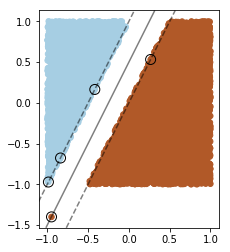

In [26]:
plot_svm_grdsrch(X1_train, y1_train, clf1)

#### dataset 2

In [27]:
clf2 = run_gridsearch(make_svc_grid_search(), X2_train, y2_train, X2_test, y2_test)

best params    :  {'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
best score     :  0.8655
nb SV          :  2581
expected[Eout] :  0.3226653331666458
test_data_score:  0.865


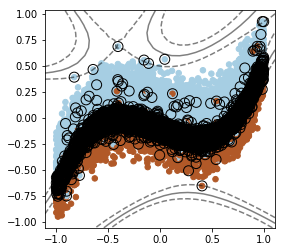

In [28]:
plot_svm_grdsrch(X2_train, y2_train, clf2)

#### dataset 3

In [29]:
clf3 = run_gridsearch(make_svc_grid_search(), X3_train, y3_train,  X3_test, y3_test)

best params    :  {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
best score     :  0.988125
nb SV          :  937
expected[Eout] :  0.11713964245530692
test_data_score:  0.987


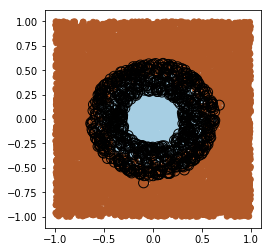

In [30]:
plot_svm_grdsrch(X3_train, y3_train, clf3)

### Observations
#### Dataset 1
Gridsearch selected the `linear` model as the winner for dataset_1 which is expected since the dataset is linearly separable.

The most important parameter for the `linear` kernel is `C` which trades off correct classification of training examples against maximization of the decision function’s margin, and behaves as a regularization parameter:
  * High `C` leads to small margins
  * Low `C` promotes large margins at the expense of accuracy.

We notice that GridsearchCV selected a `C=10` which gave us **5 Support Vectors**. This is good from a genaralization point of view and gives us an excellent **Expected(Eout) of 0.0006**

#### Dataset 2
Gridsearch selected the `rbf` model as the winner for dataset_2.

Two of the most important parameters for `rbf` are `C` and `gamma`:
  * `gamma` represents how far the influence of a single training example reaches:
    * low `gamma` means single training data have far reaching influence.
    * high `gamma` means single training data only close influence.    
  * `C` behaves as a regularization parameter like for `linear` kernel with:
    * High `C` leading to narrow margins
    * Low `C` leading to large margins
    
The selected model give us **2581 Support Vectors** and an unsafisfactory **Expected(Eout) of 0.32**
    
Reference: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

#### Dataset 3
Gridsearch selected the `rbf` model as the winner for dataset_3 which gives us **937 Support Vectors** and an **Estimated(Eout) of 0.11**.

I notice that `poly` was not selected by `grid_search` despite the data set being particularly suited to 2nd degree transformation as seen in a previous Etivity. 

This leads me to conclude that, `rbf` is a good all round achiever for non-linearly separable data sets.

 
